In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import re
import os

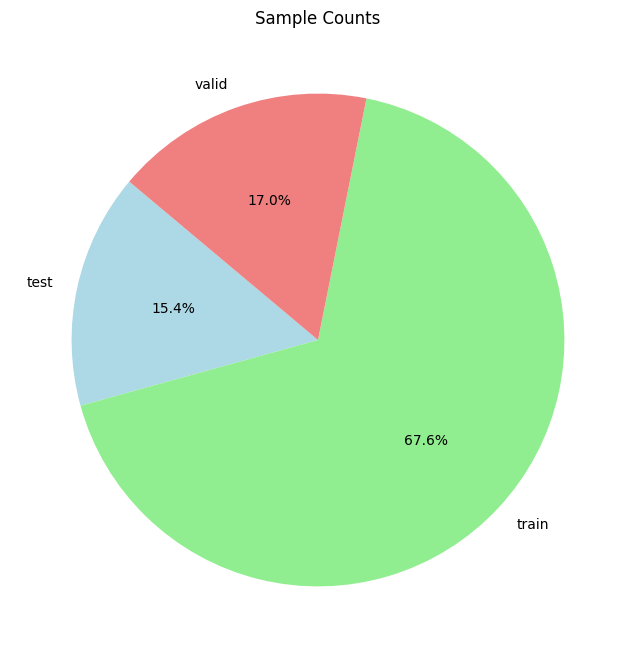

In [5]:
def get_sample_counts(directory):
    counts = {}
    for file_name in ['test.txt', 'train.txt', 'valid.txt']:
        with open(os.path.join(directory, file_name), 'r') as file:
            counts[file_name.split('.')[0]] = sum(1 for line in file if line.strip() and not line.startswith('-DOCSTART-'))
    return counts

# Plot pie chart
def plot_pie_chart(counts):
    plt.figure(figsize=(8, 8))
    plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
    plt.title('Sample Counts')
    plt.show()

sample_counts = get_sample_counts('./Roberta-NER/data/coNLL-2003')
plot_pie_chart(sample_counts)

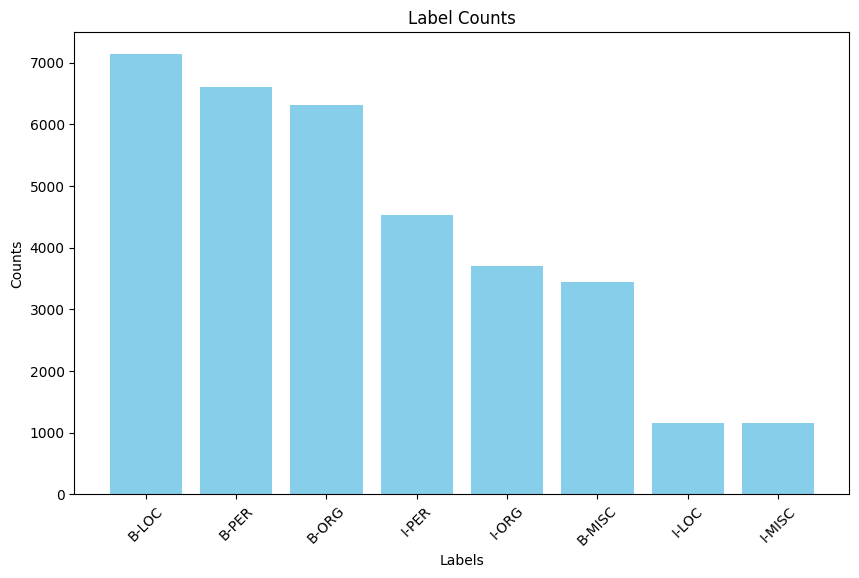

In [6]:
# Load the data
def load_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

# Parse the data
def parse_data(lines):
    labels = []
    for line in lines:
        if line.strip() and not line.startswith('-DOCSTART-'):
            tokens = line.strip().split()
            if len(tokens) == 4:
                labels.append(tokens[3])
    return labels
# Count labels
def plot_label_counts(labels):
    counter = Counter(labels)
    del counter['O']  # Remove 'O'
    sorted_labels = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    labels, counts = zip(*sorted_labels)

    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color='skyblue')
    plt.xlabel('Labels')
    plt.ylabel('Counts')
    plt.title('Label Counts')
    plt.xticks(rotation=45)
    plt.show()

# Load and parse train data
train_lines = load_data('./Roberta-NER/data/coNLL-2003/train.txt')
train_labels = parse_data(train_lines)
plot_label_counts(train_labels)


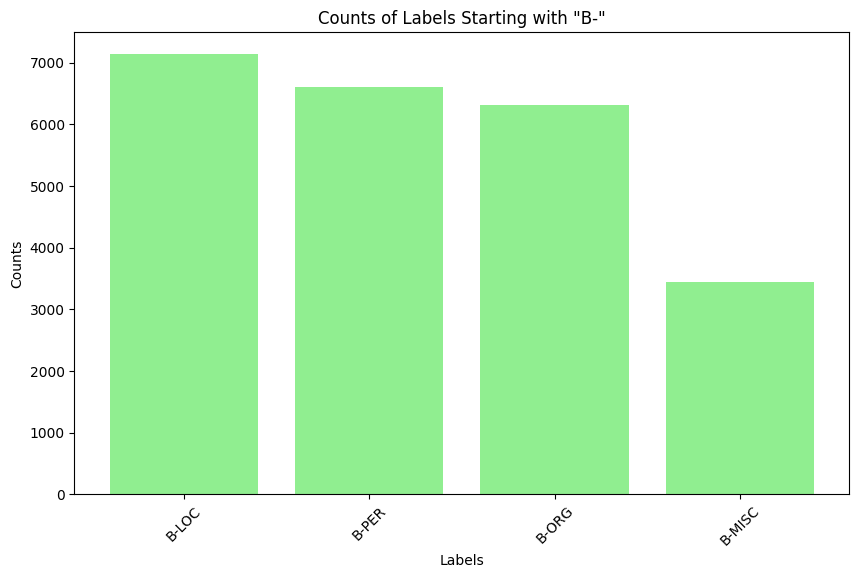

In [7]:
def plot_labels_starting_with(labels, prefix):
    filtered_labels = [label for label in labels if label.startswith(prefix)]
    counter = Counter(filtered_labels)
    sorted_labels = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    labels, counts = zip(*sorted_labels)

    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color='lightgreen')
    plt.xlabel('Labels')
    plt.ylabel('Counts')
    plt.title(f'Counts of Labels Starting with "{prefix}"')
    plt.xticks(rotation=45)
    plt.show()

# Compare labels starting with 'B'
plot_labels_starting_with(train_labels, 'B-')


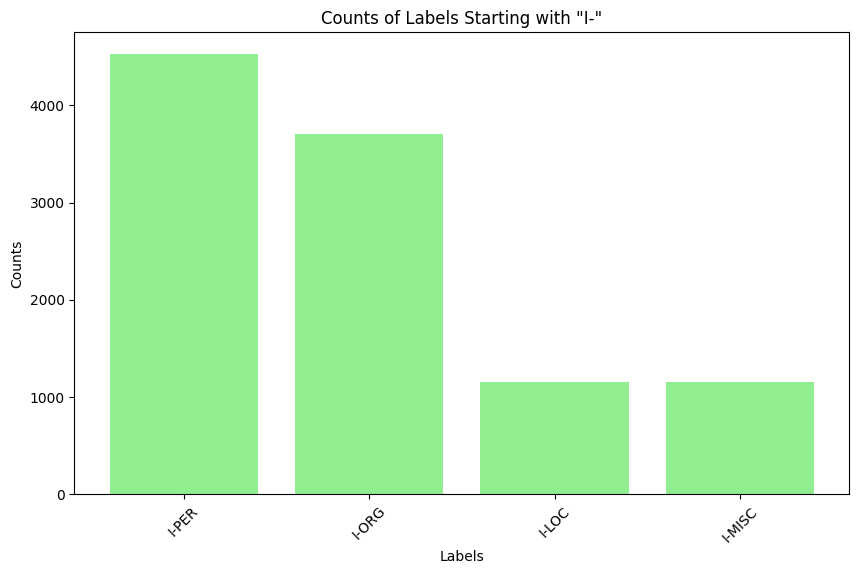

In [8]:
# Compare labels starting with 'I'
plot_labels_starting_with(train_labels, 'I-')

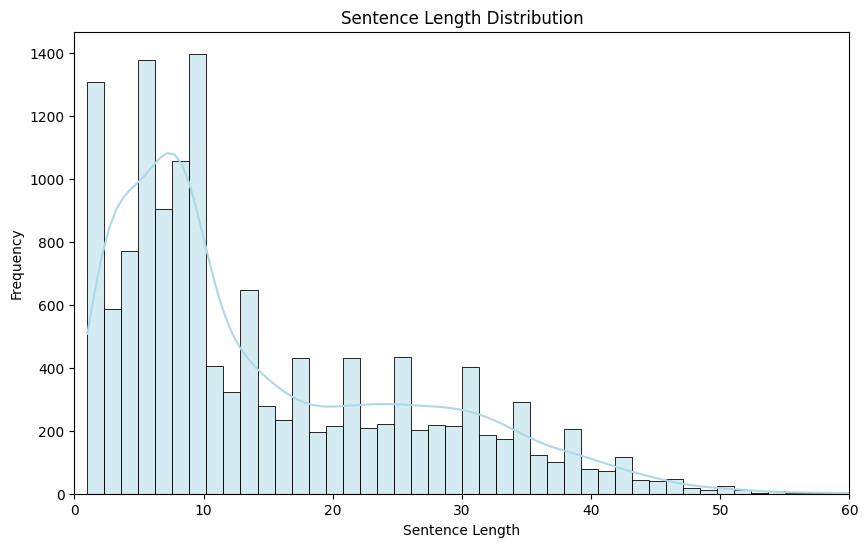

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def sentence_lengths(lines):
    lengths = []
    length = 0
    for line in lines:
        if line.startswith("-DOCSTART-"):
            continue
        if line.strip() == "":
            if length > 0:
                lengths.append(length)
            length = 0
        else:
            length += 1
    return lengths

# Calculate sentence lengths
train_lengths = sentence_lengths(train_lines)

# Plot sentence length distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_lengths, kde=True, color='lightblue', edgecolor='black')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Sentence Length Distribution')
plt.xlim(0, 60)  # Set x-axis limit from 0 to 60
plt.show()

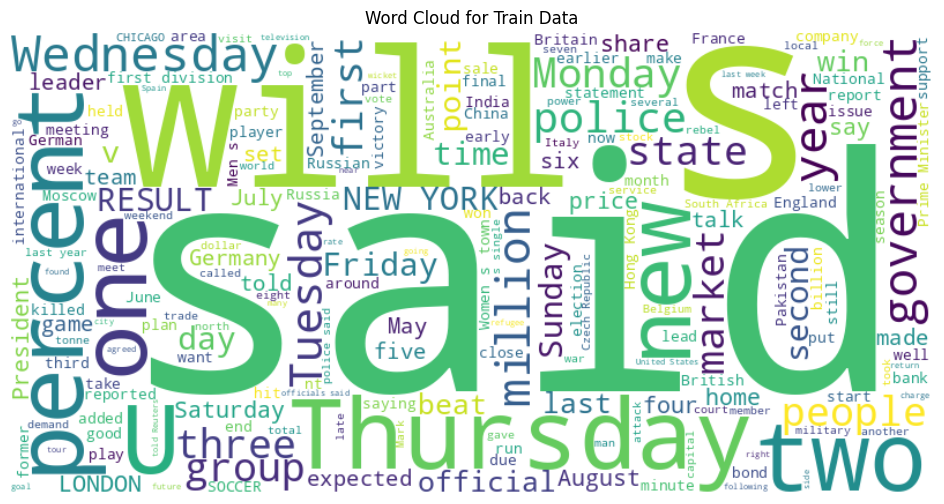

In [10]:
def plot_word_cloud(lines):
    # Remove special characters and punctuation
    text = ' '.join([line.split()[0] for line in lines if line.strip() and not line.startswith('-DOCSTART-')])
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Train Data')
    plt.show()

plot_word_cloud(train_lines)
